> **Importing Libraries**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression

> **Reading dataset**

In [3]:
df = pd.read_csv('extended_activities.csv')
df

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,10123465749,"27 Jun 2023, 04:34:42","Southbank / Melbourne, Royal Botanic Gardens V...",Run,4615,13.26,173.0,219.0,False,NaN,...,319.8,317.5,311.5,264.9,252.5,243.5,241.4,238.0,0.0,0.0
341,10123472446,"29 Jun 2023, 05:05:11",Southbank / Richmond,Run,3384,10.14,174.0,130.0,False,NaN,...,332.5,292.8,279.0,249.6,246.6,245.3,244.2,0.0,0.0,0.0
342,10123474604,"30 Jun 2023, 06:04:06",Southbank / Melbourne,Run,3433,9.10,175.0,44.0,False,NaN,...,308.0,303.9,301.8,261.6,250.7,241.0,242.2,0.0,0.0,0.0
343,10271577919,"18 Nov 2023, 00:01:54","Southbank / Mount Martha, The Briars",Ride,22391,150.03,142.0,68.0,False,Scultura 5000,...,333.8,284.2,272.7,212.1,197.2,178.5,164.5,151.0,146.1,145.4


> **Filtering the dataframe for 'RUN':**

In [5]:
df = df[df['Activity Type'] == 'Run']
df.shape

(164, 49)

> **Training the model**

In [6]:
X = np.array(df['Distance']).reshape(-1, 1)
y = np.array(df['Max Heart Rate']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
df.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.24715964063018026


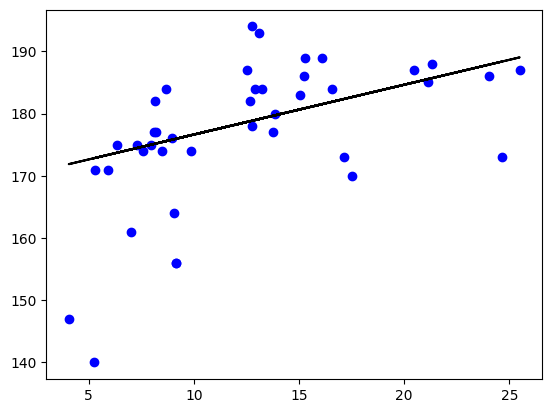

In [7]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

> **Mean_absolute_error** <br>
> **Mean_squared_error**

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 6.783816835920348
MSE: 101.70734420754674
RMSE: 10.085005910139406
